[View in Colaboratory](https://colab.research.google.com/github/rorycawley/MSc-Dissertation/blob/master/Stacked_LSTM_30_Dense.ipynb)

**Resets the VM**

In [0]:
#!kill -9 -1

**Installs and environment detection**



In [2]:
!pip show tensorflow

Name: tensorflow
Version: 1.7.0
Summary: TensorFlow helps the tensors flow
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: astor, wheel, numpy, grpcio, absl-py, protobuf, six, gast, termcolor, tensorboard
Required-by: 


In [3]:
!python --version

Python 3.6.3


In [4]:
!pip show keras

Name: Keras
Version: 2.1.6
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyyaml, six, numpy, h5py, scipy
Required-by: 


In [5]:
!pip show numpy

Name: numpy
Version: 1.14.3
Summary: NumPy: array processing for numbers, strings, records, and objects.
Home-page: http://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: None
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: 
Required-by: xgboost, tensorflow, tensorboard, scipy, PyWavelets, patsy, pandas, opencv-python, matplotlib, Keras, h5py


In [6]:
!pip show pandas

Name: pandas
Version: 0.22.0
Summary: Powerful data structures for data analysis, time series,and statistics
Home-page: http://pandas.pydata.org
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: python-dateutil, numpy, pytz
Required-by: statsmodels, pandas-gbq


In [7]:
!pip install wtte

  Found existing installation: six 1.11.0
    Uninstalling six-1.11.0:
      Successfully uninstalled six-1.11.0


In [8]:
!pip install tqdm

    100% |████████████████████████████████| 51kB 2.0MB/s 


In [9]:
!uname -or

4.4.111+ GNU/Linux


In [10]:
!gcloud version

Google Cloud SDK 199.0.0
alpha 2017.09.15
beta 2017.09.15
bq 2.0.33
core 2018.04.20
gsutil 4.30


In [11]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  #raise SystemError('GPU device not found')
  print('GPU device not found')
else:
  print('Found GPU at: {}'.format(device_name))
  config = tf.ConfigProto()
  config.gpu_options.allow_growth = True
  print(tf.test.gpu_device_name())

GPU device not found


In [12]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4647088130161425744]

In [13]:
!cat /proc/meminfo

MemTotal:       13341832 kB
MemFree:         1094992 kB
MemAvailable:   12651180 kB
Buffers:          132608 kB
Cached:         11075924 kB
SwapCached:            0 kB
Active:          1891700 kB
Inactive:        9660480 kB
Active(anon):     344016 kB
Inactive(anon):      284 kB
Active(file):    1547684 kB
Inactive(file):  9660196 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              2296 kB
Writeback:             0 kB
AnonPages:        343692 kB
Mapped:           182876 kB
Shmem:               664 kB
Slab:             625636 kB
SReclaimable:     601724 kB
SUnreclaim:        23912 kB
KernelStack:        3056 kB
PageTables:         4348 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6670916 kB
Committed_AS:    1273140 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
HugePages_Total: 

In [14]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc eagerfpu pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm kaiser fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt
bugs		:
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache s

In [0]:
def connectWithGDrive():
  !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
  !add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
  !apt-get update -qq 2>&1 > /dev/null
  !apt-get -y install -qq google-drive-ocamlfuse fuse
  from google.colab import auth
  auth.authenticate_user()
  from oauth2client.client import GoogleCredentials
  creds = GoogleCredentials.get_application_default()
  import getpass
  !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
  vcode = getpass.getpass()
  !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
  return

# Comment this out if you're already able authed to load and save files
#connectWithGDrive()

#!mkdir -p drive
#!google-drive-ocamlfuse drive

**Import numpy and pandas (to work with the csv file) and matplotlib for visualisation**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
PYTHONHASHSEED = 0

**Set column names for the training and test data**

In [0]:
id_col = 'unit_number'
time_col = 'time'
feature_cols = [ 'op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in range(1,22)]
column_names = [id_col, time_col] + feature_cols
#column_names

**Use pandas to read in the csv files**

In [0]:
# read training data
train_orig = pd.read_csv('https://raw.githubusercontent.com/rorycawley/MSc-Dissertation/master/train.csv', header=None, names=column_names)

# read test data
test_x_orig = pd.read_csv('https://raw.githubusercontent.com/rorycawley/MSc-Dissertation/master/test_x.csv', header=None, names=column_names)

# read ground truth data
test_y_orig = pd.read_csv('https://raw.githubusercontent.com/rorycawley/MSc-Dissertation/master/test_y.csv', header=None, names=['T'])

In [20]:
# Change the index to be Engine and Cycle Time
train_orig.set_index(['unit_number', 'time'], verify_integrity=True)
test_x_orig.set_index(['unit_number', 'time'], verify_integrity=True)

op_setting_1  op_setting_2  op_setting_3  \
unit_number time                                             
1           1           0.0023        0.0003         100.0   
            2          -0.0027       -0.0003         100.0   
            3           0.0003        0.0001         100.0   
            4           0.0042        0.0000         100.0   
            5           0.0014        0.0000         100.0   
            6           0.0012        0.0003         100.0   
            7          -0.0000        0.0002         100.0   
            8           0.0006       -0.0000         100.0   
            9          -0.0036        0.0000         100.0   
            10         -0.0025       -0.0001         100.0   
            11          0.0007       -0.0004         100.0   
            12          0.0026        0.0003         100.0   
            13         -0.0056        0.0003         100.0   
            14          0.0017       -0.0004         100.0   
            15         -0.0003       -0.0003         100.0   
            16         -0.0018        0.0003         100.0   
            17          0.0014        0.0002         100.0   
            18          0.0035        0.0001         100.0   
            19          0.0029        0.0001         100.0   
            20          0.0011       -0.0001         100.0   
            21          0.0038       -0.0002         100.0   
            22          0.0012        0.0001         100.0   
            23          0.0009       -0.0000         100.0   
            24         -0.0006       -0.0001         100.0   
            25          0.0028       -0.0003         100.0   
            26          0.0047       -0.0005         100.0   
            27         -0.0007        0.0001         100.0   
            28          0.0022        0.0005         100.0   
            29          0.0014        0.0001         100.0   
            30         -0.0025        0.0004         100.0   
...                        ...           ...           ...   
100         169         0.0026       -0.0000         100.0   
            170        -0.0006       -0.0004         100.0   
            171        -0.0026       -0.0003         100.0   
            172         0.0007        0.0003         100.0   
            173        -0.0003       -0.0000         100.0   
            174        -0.0005        0.0003         100.0   
            175         0.0019        0.0000         100.0   
            176         0.0002        0.0002         100.0   
            177        -0.0041       -0.0003         100.0   
            178         0.0001        0.0005         100.0   
            179         0.0041        0.0001         100.0   
            180        -0.0004        0.0001         100.0   
            181        -0.0010        0.0000         100.0   
            182        -0.0027       -0.0001         100.0   
            183         0.0009        0.0001         100.0   
            184         0.0001       -0.0004         100.0   
            185         0.0032        0.0004         100.0   
            186        -0.0025        0.0005         100.0   
            187         0.0019        0.0002         100.0   
            188         0.0010        0.0005         100.0   
            189        -0.0003        0.0002         100.0   
            190        -0.0038        0.0002         100.0   
            191        -0.0031       -0.0001         100.0   
            192        -0.0034        0.0001         100.0   
            193         0.0018        0.0004         100.0   
            194         0.0049        0.0000         100.0   
            195        -0.0011       -0.0001         100.0   
            196        -0.0006       -0.0003         100.0   
            197        -0.0038        0.0001         100.0   
            198         0.0013        0.0003         100.0   

                  sensor_measurement_1  sensor_measurement_2  \
unit_number time                               

In [0]:
#train_orig.head()

In [0]:
#test_y_orig.head()

In [23]:
train_orig.shape

(20631, 26)

In [24]:
test_x_orig.shape

(13096, 26)

In [25]:
test_y_orig.shape

(100, 1)

**Take a look a some data**

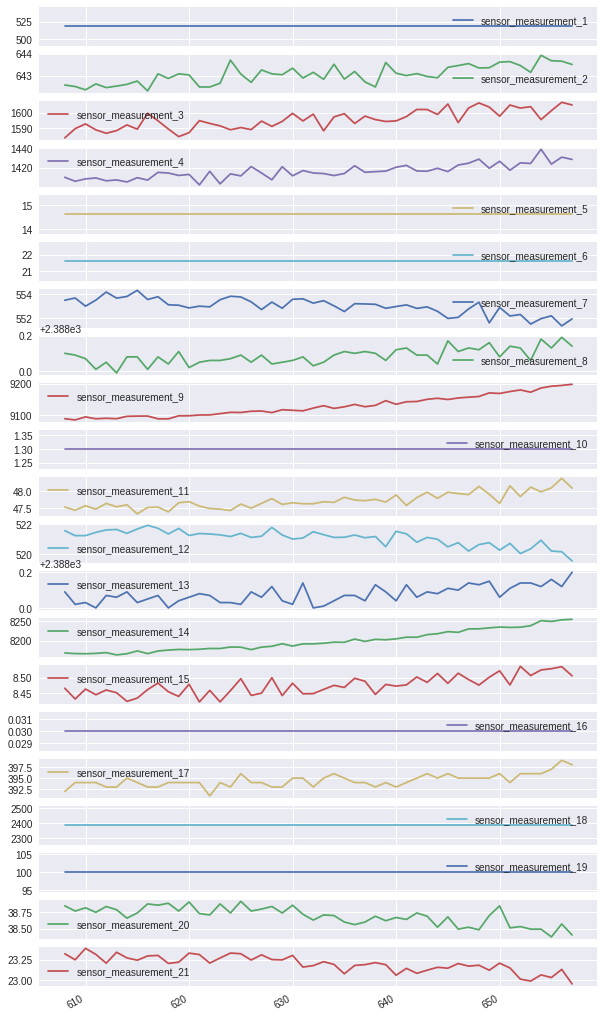

In [26]:
# Take engine 3 from the list of 100 engine sequences
engine_id3 = train_orig.loc[train_orig['unit_number'] == 3]

# Select the final 50 cycles of that engine's life before it fails
engine_id3_50cycleWindow = engine_id3.tail(50)

sensor_cols = [  'sensor_measurement_1',
                 'sensor_measurement_2',
                 'sensor_measurement_3',
                 'sensor_measurement_4',
                 'sensor_measurement_5',
                 'sensor_measurement_6',
                 'sensor_measurement_7',
                 'sensor_measurement_8',
                 'sensor_measurement_9',
                 'sensor_measurement_10',
                 'sensor_measurement_11',
                 'sensor_measurement_12',
                 'sensor_measurement_13',
                 'sensor_measurement_14',
                 'sensor_measurement_15',
                 'sensor_measurement_16',
                 'sensor_measurement_17',
                 'sensor_measurement_18',
                 'sensor_measurement_19',
                 'sensor_measurement_20',
                 'sensor_measurement_21']
# Select only the dynamic sensor readings
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[sensor_cols]

# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(10,20))

**Now we scale the data so it's all the same range and it can be processed by the neural network**

In [0]:
from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Combine the X values to normalize them
all_data_orig = pd.concat([train_orig, test_x_orig])

# Use a scale -1 to 1 since that matches our tanh activation function range
scaler = pipeline.Pipeline(steps=[
     ('minmax', MinMaxScaler(feature_range=(-1, 1))),
     ('remove_constant', VarianceThreshold())
])

all_data = all_data_orig.copy()
all_data = np.concatenate([all_data[['unit_number', 'time']], scaler.fit_transform(all_data[feature_cols])], axis=1)


# then split them back out
train = all_data[0:train_orig.shape[0], :]
test = all_data[train_orig.shape[0]:, :]

# Make engine numbers and days zero-indexed, for everybody's sanity
train[:, 0:2] -= 1
test[:, 0:2] -= 1

In [28]:
df = pd.DataFrame(train)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.0,-0.080460,-0.692308,-0.594118,-0.136829,-0.380486,1.0,0.452496,-0.492537,-0.780490,-0.225434,0.171598,-0.588235,-0.600784,-0.272028,-0.333333,0.426357,0.403772
1,0.0,1.0,0.218391,-0.538462,-0.400000,-0.048256,-0.294733,1.0,0.256039,-0.552239,-0.799515,-0.202312,0.416174,-0.441176,-0.674373,-0.177376,-0.333333,0.333333,0.416076
2,0.0,2.0,-0.494253,0.384615,-0.282353,-0.208272,-0.258947,1.0,0.420290,-0.432836,-0.719914,-0.456647,0.471400,-0.558824,-0.656414,-0.285110,-0.666667,0.255814,0.203691
3,0.0,3.0,0.080460,-0.076923,-0.282353,-0.425527,-0.337610,1.0,0.481481,-0.343284,-0.750965,-0.618497,0.644970,-0.411765,-0.650222,-0.666795,-0.333333,0.147287,0.283135
4,0.0,4.0,-0.218391,-0.384615,-0.270588,-0.423021,-0.190749,1.0,0.336554,-0.492537,-0.700081,-0.445087,0.380671,-0.529412,-0.650532,-0.195845,-0.166667,0.178295,0.364718


**Build the data to be processed by the RNN, must be of the format *(batch_size, timesteps, input_features)* instead of *(timesteps, input_features)*  **

In [0]:
import tqdm
from tqdm import tqdm
def build_data(engine, time, x, max_time, is_test, mask_value):
    # y[0] will be days remaining, y[1] will be event indicator, always 1 for this data
    out_y = []
    
    # number of features
    d = x.shape[1]

    # A full history of sensor readings to date for each x
    out_x = []

    # Get the unique number of enginges
    n_engines= np.unique(train[:, 0]).size
    
    for i in tqdm(range(n_engines)):
        # When did the engine fail? (Last day + 1 for train data, irrelevant for test.)
      
        # This gets the highest cycle time for an engine, this is the failure time for training data
        # but not for the test data
        max_engine_time = int(np.max(time[engine == i])) + 1
        #print("Engine " + str(i) + " has max_engine_time " + str(max_engine_time))
        
        # The
        if is_test:
            start = max_engine_time - 1
        else:
            start = 0

        this_x = []

        for j in range(start, max_engine_time):
            # This gets all of the sensor values for the engine i
            engine_x = x[engine == i]

            # This adds the final cycle time to the list
            out_y.append(np.array((max_engine_time - j, 1), ndmin=2))

            xtemp = np.zeros((1, max_time, d))
            xtemp += mask_value
            
            xtemp[:, max_time-min(j, 99)-1:max_time, :] = engine_x[max(0, j-max_time+1):j+1, :]
            this_x.append(xtemp)
            

            
        this_x = np.concatenate(this_x)
        out_x.append(this_x)
    out_x = np.concatenate(out_x)
    out_y = np.concatenate(out_y)
    return out_x, out_y

In [30]:
# This is the current format of the data (timesteps, input_features)
train.shape

(20631, 19)

In [31]:
# # Configurable observation look-back period for each engine/day
max_time = 100
mask_value = -99

# Build the training data 
train_x, train_y = build_data( engine = train[:, 0], time = train[:, 1], x = train[:, 2:], max_time = max_time, is_test = False, mask_value = mask_value)

# Build the test data 
test_x,_ = build_data(engine=test[:, 0], time=test[:, 1], x=test[:, 2:], max_time=max_time, is_test=True, mask_value=mask_value)

# always observed in our case
test_y = test_y_orig.copy()
test_y['E'] = 1

100%|██████████| 100/100 [00:00<00:00, 7657.47it/s]


In [32]:
train_y[:,0]

array([192, 191, 190, ...,   3,   2,   1])

In [33]:
# this is the new format (batch_size, timesteps, input_features)
train_x.shape

(20631, 100, 17)

In [34]:
train_y.shape

(20631, 2)

In [35]:
test_x.shape

(100, 100, 17)

**Initialise the values for the model**

In [36]:
tte_mean_train = np.nanmean(train_y[:,0])
mean_u = np.nanmean(train_y[:,1])

# Initialization value for alpha-bias 
init_alpha = -1.0/np.log(1.0-1.0/(tte_mean_train+1.0) )
init_alpha = init_alpha/mean_u
print('tte_mean_train', tte_mean_train, 'init_alpha: ',init_alpha,'mean uncensored train: ',mean_u)

tte_mean_train 108.80786195530997 init_alpha:  109.30709957832491 mean uncensored train:  1.0


**Start building the model**

In [37]:
import keras.backend as K
from keras.callbacks import History, TerminateOnNaN
from wtte.wtte import WeightWatcher


K.set_epsilon(1e-10)
print('epsilon', K.epsilon())

history = History()
weightwatcher = WeightWatcher()
nanterminator = TerminateOnNaN()

epsilon 1e-10


Using TensorFlow backend.


In [38]:
train_x.shape[-1]

17

In [0]:
import wtte.wtte as wtte

#from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Masking, Lambda, Dropout
from keras.optimizers import RMSprop,adam


n_features = train_x.shape[-1]

model = Sequential()

# Mask parts of the lookback period that are all zeros (i.e., unobserved) so they don't skew the model
model.add(Masking(mask_value=mask_value, input_shape=(None, n_features)))
model.add(LSTM(30, activation='tanh', dropout=0.1,recurrent_dropout=0.25, return_sequences=True))
model.add(LSTM(30, activation='tanh', dropout=0.1,recurrent_dropout=0.25, return_sequences=True))
model.add(LSTM(30, activation='tanh', dropout=0.1,recurrent_dropout=0.25))
model.add(Dense(30))
model.add(Dropout(0.5))
model.add(Dense(30))


# We need 2 neurons to output Alpha and Beta parameters for our Weibull distribution
model.add(Dense(2))

model.add(Lambda(wtte.output_lambda, 
                 arguments={"init_alpha":init_alpha, 
                            "max_beta_value":100.0, 
                            "alpha_kernel_scalefactor":0.5
                           },
                ))

# Use the discrete log-likelihood for Weibull survival data as our loss function
loss = wtte.loss(kind='discrete',reduce_loss=False).loss_function

model.compile(loss=loss, optimizer=adam(lr=.01, clipvalue=0.5))

**Train the model to the data**

In [0]:
import time
start = time.time()

In [59]:
model.fit(train_x, train_y,
              epochs=14,
              batch_size=128, 
              verbose=1,
              validation_data=(test_x, test_y),
              callbacks=[nanterminator,history,weightwatcher])

Train on 20631 samples, validate on 100 samples
Epoch 1/14
  256/20631 [..............................] - ETA: 6:48 - loss: nan    Batch 1: Invalid loss, terminating training


In [60]:
end = time.time()
print(end - start)

9.504032373428345


In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_4 (Masking)          (None, None, 17)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, None, 70)          24640     
_________________________________________________________________
lstm_11 (LSTM)               (None, None, 70)          39480     
_________________________________________________________________
lstm_12 (LSTM)               (None, 70)                39480     
_________________________________________________________________
dense_10 (Dense)             (None, 30)                2130      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
__________

**Show results of the training**

KeyError: ignored

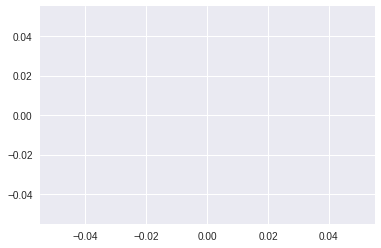

In [62]:
plt.plot(history.history['loss'],    label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.title('loss')
plt.legend()

weightwatcher.plot()

**Use the model to make predictions**

In [0]:
# Make some predictions and put them alongside the real TTE and event indicator values
test_predict = model.predict(test_x)
test_predict = np.resize(test_predict, (100, 2))
test_result = np.concatenate((test_y, test_predict), axis=1)

**Show the accuracy of the prediction by comparing the mode of the distribution with the true value**

In [0]:
# This is the true value
test_y.head()

,T,E
0,112,1
1,98,1
2,69,1
3,82,1
4,91,1


In [0]:
# this is the predicted alpha and beta defining the curve for the distribution
test_predict.shape

(100, 2)

In [0]:
test_predict

array([[173.29349  ,   4.474507 ],
       [133.77193  ,   4.573784 ],
       [ 67.57444  ,   4.3196297],
       [ 90.41337  ,   4.488415 ],
       [ 98.82356  ,   4.535871 ],
       [123.47388  ,   4.5657983],
       [111.80779  ,   4.4906716],
       [102.0305   ,   4.479202 ],
       [170.7555   ,   4.496759 ],
       [ 89.822266 ,   4.4704895],
       [102.225426 ,   4.525738 ],
       [107.38894  ,   4.233098 ],
       [ 79.98441  ,   4.3706546],
       [168.18279  ,   4.5358114],
       [118.80823  ,   4.577011 ],
       [120.70701  ,   4.5399423],
       [ 65.20336  ,   4.2687316],
       [ 47.577663 ,   3.9355085],
       [ 91.6362   ,   4.446729 ],
       [ 12.856474 ,   2.788281 ],
       [ 84.38372  ,   4.380575 ],
       [153.64012  ,   4.5659485],
       [122.684074 ,   4.5059667],
       [ 24.908638 ,   3.3985755],
       [143.79184  ,   4.508973 ],
       [149.44485  ,   4.4807315],
       [ 78.288605 ,   4.373645 ],
       [110.224365 ,   4.5119987],
       [ 85.831696 ,

In [0]:
test_result.shape

(100, 4)

In [0]:
test_result

array([[112.        ,   1.        , 173.29348755,   4.47450686],
       [ 98.        ,   1.        , 133.77192688,   4.57378387],
       [ 69.        ,   1.        ,  67.57444   ,   4.31962967],
       [ 82.        ,   1.        ,  90.41336823,   4.48841476],
       [ 91.        ,   1.        ,  98.82356262,   4.53587103],
       [ 93.        ,   1.        , 123.47387695,   4.56579828],
       [ 91.        ,   1.        , 111.80779266,   4.49067163],
       [ 95.        ,   1.        , 102.03050232,   4.47920179],
       [111.        ,   1.        , 170.75549316,   4.49675894],
       [ 96.        ,   1.        ,  89.82226562,   4.4704895 ],
       [ 97.        ,   1.        , 102.22542572,   4.52573776],
       [124.        ,   1.        , 107.3889389 ,   4.23309803],
       [ 95.        ,   1.        ,  79.98441315,   4.37065458],
       [107.        ,   1.        , 168.18278503,   4.53581142],
       [ 83.        ,   1.        , 118.80822754,   4.57701111],
       [ 84.        ,   1

In [0]:
theTruth = test_y['T'].tolist()
theTruth

[112,
 98,
 69,
 82,
 91,
 93,
 91,
 95,
 111,
 96,
 97,
 124,
 95,
 107,
 83,
 84,
 50,
 28,
 87,
 16,
 57,
 111,
 113,
 20,
 145,
 119,
 66,
 97,
 90,
 115,
 8,
 48,
 106,
 7,
 11,
 19,
 21,
 50,
 142,
 28,
 18,
 10,
 59,
 109,
 114,
 47,
 135,
 92,
 21,
 79,
 114,
 29,
 26,
 97,
 137,
 15,
 103,
 37,
 114,
 100,
 21,
 54,
 72,
 28,
 128,
 14,
 77,
 8,
 121,
 94,
 118,
 50,
 131,
 126,
 113,
 10,
 34,
 107,
 63,
 90,
 8,
 9,
 137,
 58,
 118,
 89,
 116,
 115,
 136,
 28,
 38,
 20,
 85,
 55,
 128,
 137,
 82,
 59,
 117,
 20]

In [0]:
def weibull_pdf(alpha, beta, t):
    return (beta/alpha) * (t/alpha)**(beta-1)*np.exp(- (t/alpha)**beta)

def weibull_median(alpha, beta):
    return alpha*(-np.log(.5))**(1/beta)
  
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)
  
def weibull_mode(alpha, beta):
    assert np.all(beta > 1)
    return alpha * ((beta-1)/beta)**(1/beta)
test_results_df = pd.DataFrame(test_result, columns=['T', 'E', 'alpha', 'beta'])

test_results_df['T'].describe()

count    100.00000
mean      75.52000
std       41.76497
min        7.00000
25%       32.75000
50%       86.00000
75%      112.25000
max      145.00000
Name: T, dtype: float64

In [0]:

test_results_df['predicted_mode'] = test_results_df[['alpha', 'beta']].apply(lambda row: weibull_mode(row[0], row[1]), axis=1)
predictedModeValues = test_results_df['predicted_mode'].tolist()

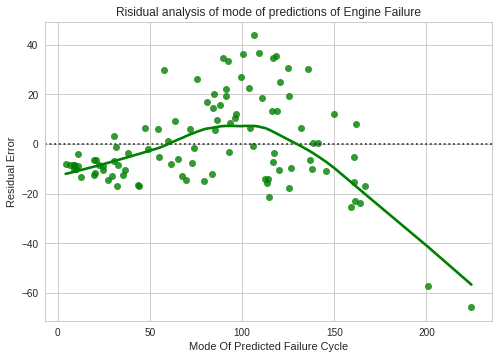

In [0]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

# List of data
prediced_list = predictedModeValues 
truth_list =  theTruth 
predictions = np.array(prediced_list)
test = np.array(truth_list)

# Plot the residuals after fitting a linear model
r_ax = sns.residplot(predictions, test, lowess=True, color="g")
r_ax.set(ylabel='Residual Error', xlabel='Mode Of Predicted Failure Cycle')
plt.title('Risidual analysis of mode of predictions of Engine Failure')

plt.show()

In [0]:
# To compare the different models I use RMSE
# http://hamelg.blogspot.ie/2015/11/python-for-data-analysis-part-27-linear.html
# Root mean squared error (RMSE) is a common evaluation metric for predictions 
# involving real numbers. Root mean squared error is square root of the average of the squared error (residuals.). 
from sklearn.metrics import mean_squared_error

def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    # use the scikit-learn library's mean squared error function and take the square root of the result
    return mean_squared_error(predicted, targets)**0.5

rmse(predictions, test)

23.704982677254076

In [0]:
test_results_df['unit_number'] = np.arange(1, test_results_df.shape[0]+1)

In [0]:
test_results_df.head()

,T,E,alpha,beta,predicted_mode,unit_number
0,112.0,1.0,173.293488,4.474507,163.768964,1
1,98.0,1.0,133.771927,4.573784,126.747257,2
2,69.0,1.0,67.574440,4.319630,63.578267,3
3,82.0,1.0,90.413368,4.488415,85.476028,4
4,91.0,1.0,98.823563,4.535871,93.543602,5


alpha 89.55697732448579 beta 4.119435749053955


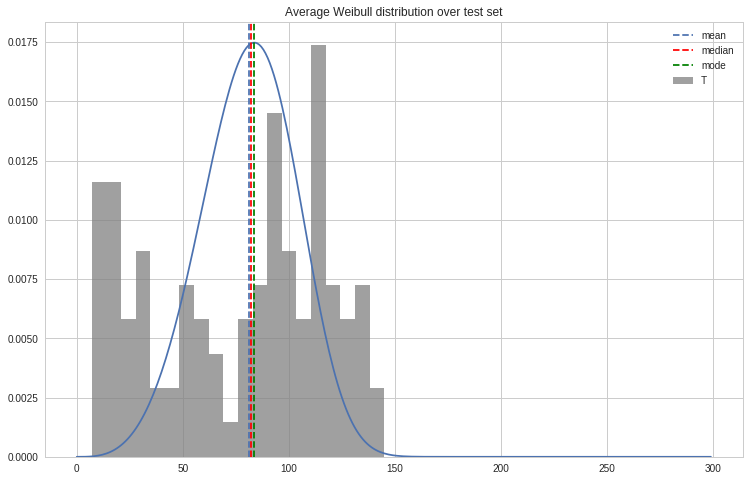

In [0]:
import math

t=np.arange(0,300)
alpha = test_results_df['alpha'].mean()
beta = test_results_df['beta'].mean()

plt.plot(t, weibull_pdf(alpha,beta, t))
mu = weibull_mean(alpha, beta)
median =weibull_median(alpha, beta)
mode = weibull_mode(alpha, beta)
plt.axvline(mu, ls='--', label='mean')
plt.axvline(median, ls='--', color='red', label='median')
plt.axvline(mode, ls='--', color='green', label='mode')
n, bins, patches = plt.hist(test_results_df['T'], 20, normed=1, facecolor='grey', alpha=0.75, label='T')
plt.legend()

plt.gcf().set_size_inches(12.5, 8)
plt.title('Average Weibull distribution over test set')
print('alpha', alpha, 'beta', beta)

In [0]:
def plot_weibull_predictions(results_df):

    fig, axarr = plt.subplots(3, figsize=(20,30))

    t=np.arange(0,400)
    flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

    palette = sns.color_palette(flatui, results_df.shape[0] + 1)
    color_dict = dict(enumerate(palette))

    for i, row in enumerate(results_df.iterrows()):
        alpha=row[1]['alpha']
        beta = row[1]['beta']
        T = row[1]['T']
        label = 'a={} b={}'.format(alpha, beta)

        color = color_dict[i]
        ax= axarr[0]
        mode = weibull_mode(alpha, beta)
        y_max = weibull_pdf(alpha, beta, mode)    

        ax.plot(t, weibull_pdf(alpha, beta, t), color=color, label=label)
        ax.scatter(T, weibull_pdf(alpha,beta, T), color=color, s=100)
        ax.vlines(mode, ymin=0, ymax=y_max, colors=color, linestyles='--')

        ax.set_title('Weibull distributions')
    
    ax=axarr[1]
    
    median_predictions = weibull_median(results_df['alpha'], results_df['beta'])
    mean_predictions = results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
    mode_predictions = weibull_mode(results_df['alpha'], results_df['beta'])

    ax.scatter(results_df['T'], mode_predictions, label='m_prediction')
    ax.set_title('MAP prediction Vs. true')
    

    ax.legend()
    
    ax=axarr[2]
    sns.distplot(results_df['T'] - mode_predictions, ax=ax)
    ax.set_title('Error')

    plt.show()

In [0]:
train_orig.describe()

,unit_number,time,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [0]:
test_results_df.head()
test_results_df.loc[test_results_df['unit_number'] == 1]


,T,E,alpha,beta,predicted_mode,unit_number
0,112.0,1.0,173.293488,4.474507,163.768964,1


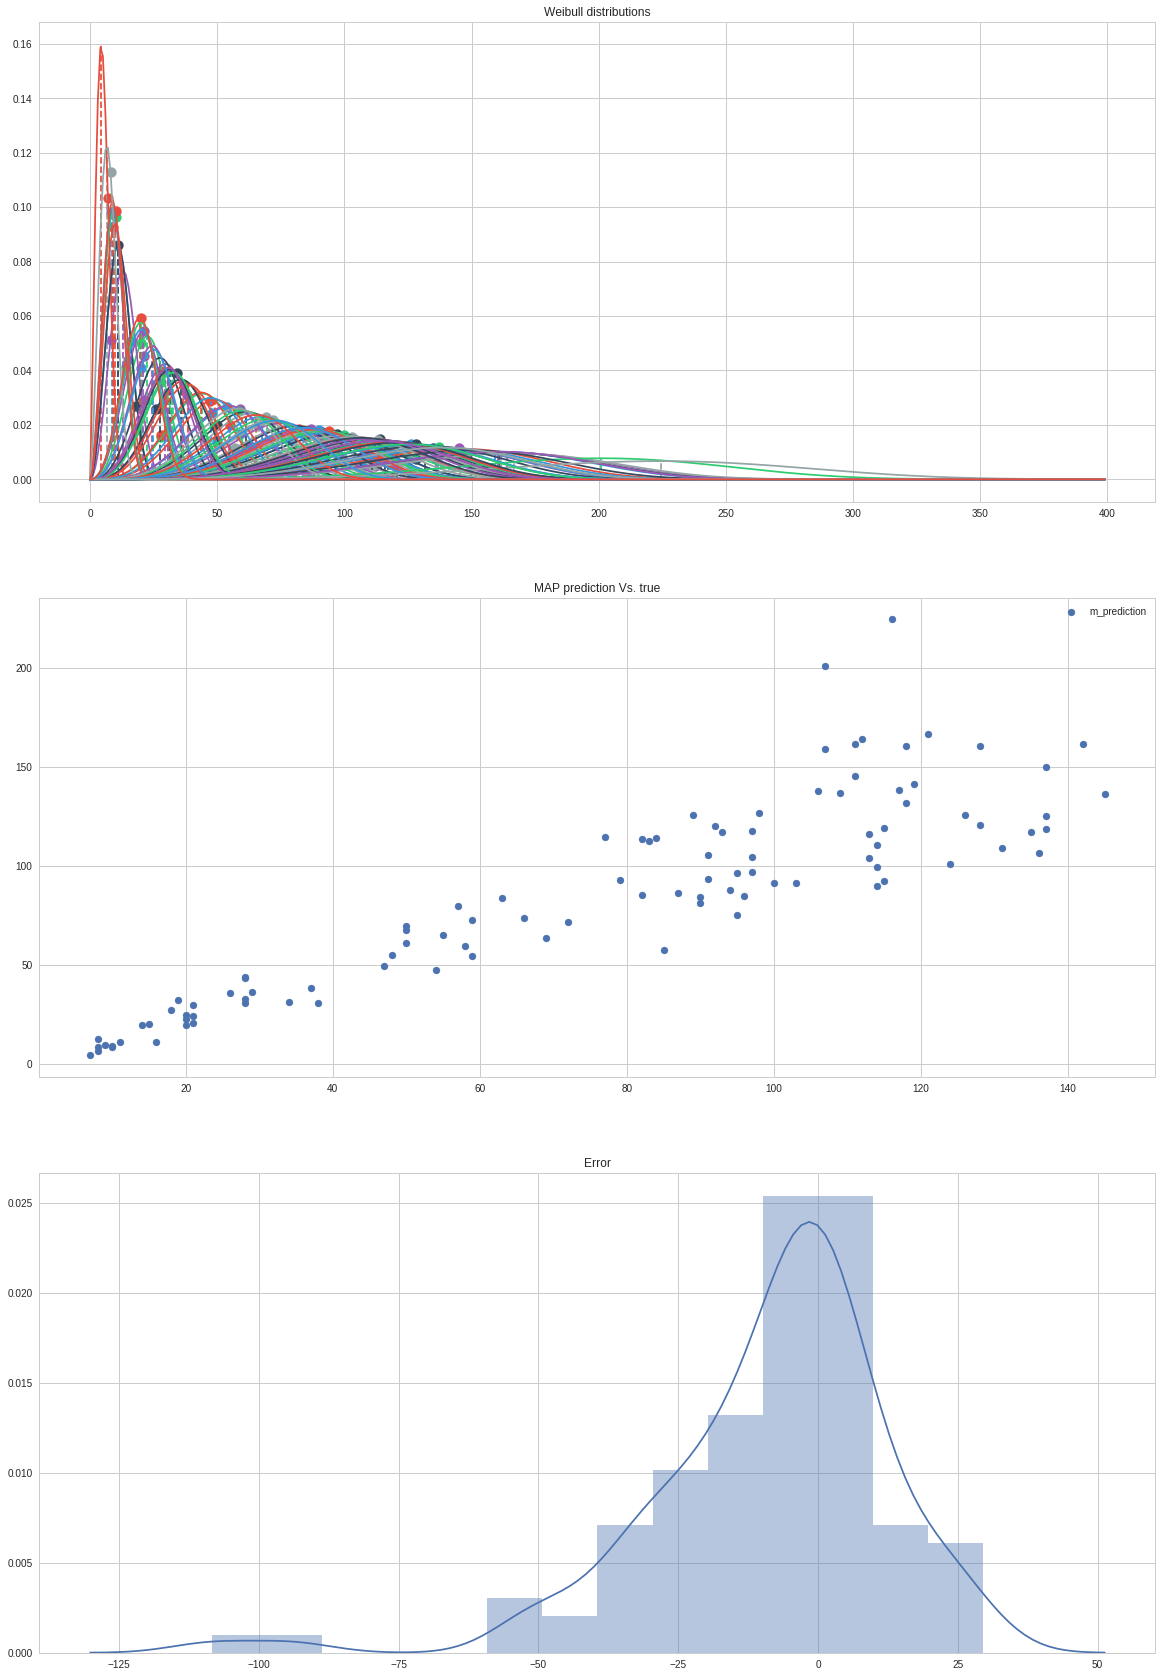

In [0]:
import seaborn as sns

plot_weibull_predictions(test_results_df)

In [0]:
test_results_df['predicted_mu'] = test_results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df['predicted_median'] = test_results_df[['alpha', 'beta']].apply(lambda row: weibull_median(row[0], row[1]), axis=1)
test_results_df['predicted_mode'] = test_results_df[['alpha', 'beta']].apply(lambda row: weibull_mode(row[0], row[1]), axis=1)

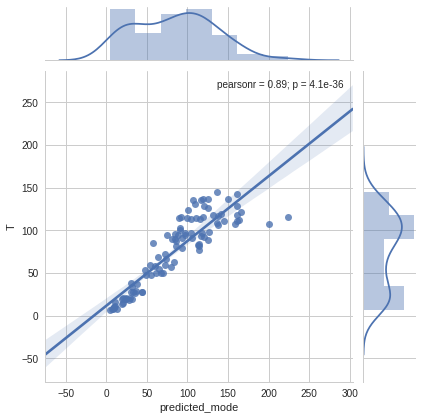

In [0]:
import seaborn as sns
sns.jointplot(data=test_results_df, y='T', x='predicted_mode',kind="reg")

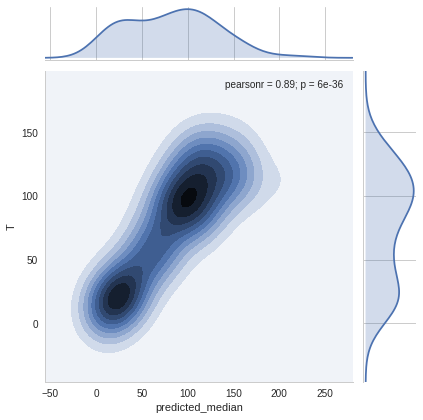

In [0]:
sns.jointplot(data=test_results_df, y='T', x='predicted_median',kind="kde" )

In [0]:
test_results_df['error'] = test_results_df['T']-test_results_df['predicted_median']
test_results_df['error'].describe()

count    100.000000
mean      -6.821187
std       21.479667
min     -103.309992
25%      -16.404813
50%       -2.792370
75%        4.978852
max       32.210497
Name: error, dtype: float64

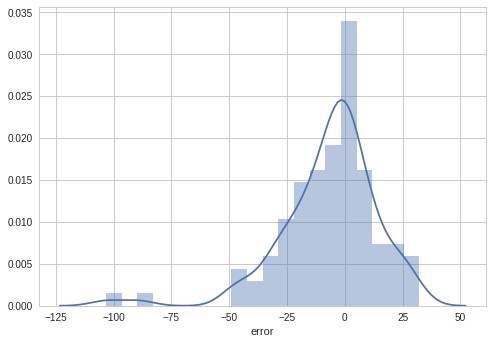

In [0]:
sns.distplot(test_results_df['error'], bins=20)

**Training evaluation**

In [0]:
test_y.shape


(100, 2)

In [0]:
train_y.shape


(20631, 2)

In [0]:
train_predict=model.predict(train_x)


In [0]:
train_predict = np.resize(train_predict, (20631, 2))
train_result = np.concatenate((train_y, train_predict), axis=1)

In [0]:
train_predict.shape


(20631, 2)

In [0]:
train_results_df = pd.DataFrame(train_result, columns=['T', 'E', 'alpha', 'beta'])


In [0]:
train_results_df[['unit_number', 'time']] = train_orig[['unit_number', 'time']]


In [0]:
train_results_df['unit_number'].nunique()


100

In [0]:
train_results_df.shape


(20631, 6)

In [0]:
train_results_df.groupby('unit_number')['beta'].describe()


,count,mean,std,min,25%,50%,75%,max
unit_number,,,,,,,,
1,192.0,4.122564,0.566500,1.839184,4.228447,4.345160,4.423548,4.528607
2,287.0,4.166880,0.528202,1.953359,4.134672,4.356031,4.451855,4.585751
3,179.0,4.217282,0.560813,1.846027,4.237222,4.458344,4.527894,4.600240
4,189.0,4.217278,0.617906,1.839079,4.294456,4.472091,4.548660,4.584353
5,269.0,4.153701,0.552344,1.836812,4.245627,4.385268,4.423770,4.568246
6,188.0,4.162044,0.671160,1.836474,4.118073,4.511920,4.550860,4.591925
7,259.0,4.177343,0.550909,1.927203,4.167540,4.407605,4.460970,4.563291
8,150.0,4.178556,0.611206,1.906458,4.086987,4.437550,4.560724,4.596419
9,201.0,4.231612,0.531261,1.841499,4.334343,4.448307,4.496529,4.586343


In [0]:
train_results_df['predicted_mu'] = train_results_df[['alpha', 'beta']].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df['predicted_median'] = train_results_df[['alpha', 'beta']].apply(lambda row: weibull_median(row[0], row[1]), axis=1)

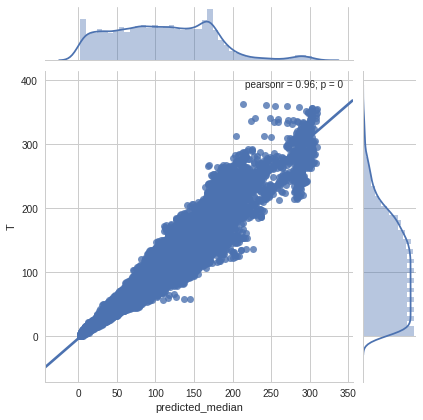

In [0]:
sns.jointplot(data=train_results_df, y='T', x='predicted_median',kind="reg")

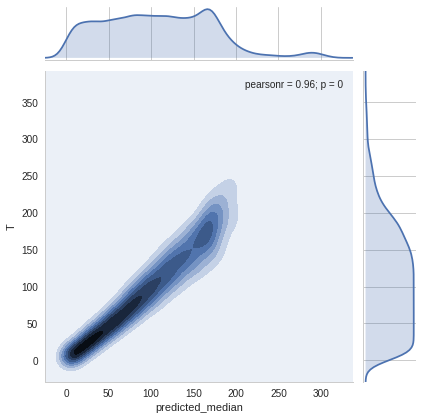

In [0]:
sns.jointplot(data=train_results_df, y='T', x='predicted_median',kind="kde" )


In [0]:
train_results_df['error'] = train_results_df['T']-train_results_df['predicted_median']
train_results_df['error'].describe()


count    20631.000000
mean         1.468917
std         18.709821
min        -90.330914
25%         -8.301833
50%         -0.451444
75%         10.288951
max        148.115388
Name: error, dtype: float64

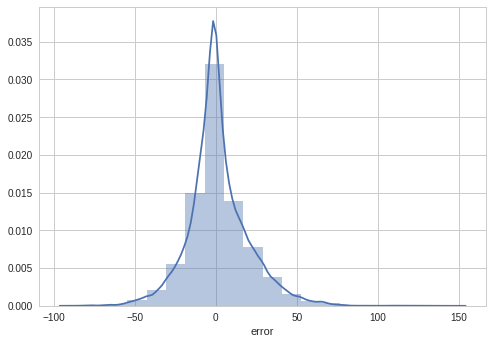

In [0]:
sns.distplot(train_results_df['error'], bins=20)
